# < 3주차 과제 1 : MLP 마음대로 다뤄보기>
- dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기)
- activation functions 중 relu사용시 함수 직접 정의
- lr, optimizer 등 바꿔보기
- hidden layer/neuron 수를 바꾸기
- 전처리도 추가
- 모든 시도를 올려주세요!
- 제일 높은 acc를 보인 시도를 명시해주세요!


In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_breast_cancer
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## 아래 데이터셋 중 원하는 데이터셋 하나를 선택하여, 코드 과제 진행하기!
- 1) load_digits() <br>
- 2) load_wine()

In [2]:
from sklearn.datasets import load_wine
# 데이터셋 종류 : 
data = load_wine()

In [3]:
from sklearn.datasets import load_digits
# 데이터셋 종류 : 
data2 = load_digits()

In [4]:
data2

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
data2.data.shape

(1797, 64)

In [6]:
input = data.data
output = data.target

In [7]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

CUDA is a parallel computing platform and application programming interface that allows software to use certain types of graphics processing units for general purpose processing, an approach called general-purpose computing on GPUs. -- implemented GPU computing if capable use else just use cpu

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == "cuda":
  torch.cuda.manual_seed_all(777)

split --> stratify : target 개수를 비율에 맞게

In [9]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.3, random_state = 42, stratify= data.target, shuffle = True)

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.FloatTensor(x_test)
y_test = torch.LongTensor(y_test)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문 

float vs long : torch.FloatTensor --> float32
torch.LongTensor --> int64

float32 사용 이유
float32는 32bits를 사용하고 float64는 64bits를 사용한다는 것인데, 이는 즉 메모리 용량 차이가 두배이다.

메모리 사용량이 두 배 차이 나므로 float64를 사용하면 연산속도가 느려질 수 있다.

하지만 float64는 float32에 비해 훨씬 정확하게 숫자를 나타낼 수 있으며 훨씬 큰 숫자도 나타낼 수 있다.

int64 사용 이유
What is difference between Int32 and Int64?
In short you can not store more than 32767 value in int16 , more than 2147483647 value in int32 and more than 9223372036854775807 value in int64


In [10]:
x_train

tensor([[1.3750e+01, 1.7300e+00, 2.4100e+00,  ..., 1.1500e+00, 2.9000e+00,
         1.3200e+03],
        [1.3730e+01, 1.5000e+00, 2.7000e+00,  ..., 1.1900e+00, 2.7100e+00,
         1.2850e+03],
        [1.3280e+01, 1.6400e+00, 2.8400e+00,  ..., 1.0900e+00, 2.7800e+00,
         8.8000e+02],
        ...,
        [1.3110e+01, 1.9000e+00, 2.7500e+00,  ..., 6.1000e-01, 1.3300e+00,
         4.2500e+02],
        [1.2250e+01, 4.7200e+00, 2.5400e+00,  ..., 7.5000e-01, 1.2700e+00,
         7.2000e+02],
        [1.2640e+01, 1.3600e+00, 2.0200e+00,  ..., 9.8000e-01, 1.5900e+00,
         4.5000e+02]], device='cuda:0')

In [11]:
y_train

tensor([0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2,
        0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2,
        0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0,
        0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2,
        1, 2, 2, 1], device='cuda:0')

In [12]:
print(x_train[0])
print(y_train[0])

#input 30개 (속성이 30개)
#y의 class는 2개 (양성과 음성)

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


x features --> 
'feature_names': ['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline']}

  target --> class0 class1 class2 --> 등급

파이토치에서는 데이터셋을 좀 더 쉽게 다룰 수 있도록 유용한 도구로서 torch.utils.data.Dataset과 torch.utils.data.DataLoader를 제공합니다. 이를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있습니다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것
- init : class 에서 객체가 생성되면 바로 실행되는 함수
- len : observation 수를 정의하는 함수
- getitem : iteration 마다 해당하는 데이터를 돌려주는 함수

In [13]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = x_train
    self.y_data = [[y] for y in y_train]
#  데이터셋의 전처리를 해주는 부분

  def __len__(self):
    return len(self.x_data)
#  데이터셋의 길이. 즉, 총 샘플의 수를 적어주는 부분

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx]).to(device)
    y = torch.LongTensor(self.y_data[idx]).to(device)
#  데이터셋에서 특정 1개의 샘플을 가져오는 함수

    return x,y

In [14]:
batch_size = 8

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=batch_size) 

In [15]:
# input_layer와 hidden_layer의 노드 개수를 어떻게 바꿔줘야할까? 
# hidden layer/neuron 수를 바꾸기
"""
model = nn.Sequential(
          nn.Linear(30,398, bias=True), 
          nn.Sigmoid(),
          nn.Linear(398,15, bias=True),
          nn.Sigmoid(),
          nn.Linear(15,5, bias=True),  #hidden layer
          nn.Softmax()  #activation
          ).to(device)

"""

#구조 참고용 --> 밑에 있는 class 형태로 구현

'\nmodel = nn.Sequential(\n          nn.Linear(30,398, bias=True), \n          nn.Sigmoid(),\n          nn.Linear(398,15, bias=True),\n          nn.Sigmoid(),\n          nn.Linear(15,5, bias=True),  #hidden layer\n          nn.Softmax()  #activation\n          ).to(device)\n\n'

class로 구현 가능
- init : 초기 생성 함수
- foward : 순전파(입력값 => 예측값 의 과정)

In [16]:
x_train

tensor([[1.3750e+01, 1.7300e+00, 2.4100e+00,  ..., 1.1500e+00, 2.9000e+00,
         1.3200e+03],
        [1.3730e+01, 1.5000e+00, 2.7000e+00,  ..., 1.1900e+00, 2.7100e+00,
         1.2850e+03],
        [1.3280e+01, 1.6400e+00, 2.8400e+00,  ..., 1.0900e+00, 2.7800e+00,
         8.8000e+02],
        ...,
        [1.3110e+01, 1.9000e+00, 2.7500e+00,  ..., 6.1000e-01, 1.3300e+00,
         4.2500e+02],
        [1.2250e+01, 4.7200e+00, 2.5400e+00,  ..., 7.5000e-01, 1.2700e+00,
         7.2000e+02],
        [1.2640e+01, 1.3600e+00, 2.0200e+00,  ..., 9.8000e-01, 1.5900e+00,
         4.5000e+02]], device='cuda:0')

이미 값들이 0~1 사이 + non negative

The Input Layer

Simple--every NN has exactly one of them--no exceptions that I'm aware of.

With respect to the number of neurons comprising this layer, this parameter is completely and uniquely determined once you know the shape of your training data. Specifically, the number of neurons comprising that layer is equal to the number of features (columns) in your data. Some NN configurations add one additional node for a bias term.

The Output Layer

Like the Input layer, every NN has exactly one output layer. Determining its size (number of neurons) is simple; it is completely determined by the chosen model configuration.

Is your NN going to run in Machine Mode or Regression Mode (the ML convention of using a term that is also used in statistics but assigning a different meaning to it is very confusing)? Machine mode: returns a class label (e.g., "Premium Account"/"Basic Account"). Regression Mode returns a value (e.g., price).

If the NN is a regressor, then the output layer has a single node.

If the NN is a classifier, then it also has a single node unless softmax is used in which case the output layer has one node per class label in your model.

The Hidden Layers

So those few rules set the number of layers and size (neurons/layer) for both the input and output layers. That leaves the hidden layers.

How many hidden layers? Well, if your data is linearly separable (which you often know by the time you begin coding a NN), then you don't need any hidden layers at all. Of course, you don't need an NN to resolve your data either, but it will still do the job.

Beyond that, as you probably know, there's a mountain of commentary on the question of hidden layer configuration in NNs (see the insanely thorough and insightful NN FAQ for an excellent summary of that commentary). One issue within this subject on which there is a consensus is the performance difference from adding additional hidden layers: the situations in which performance improves with a second (or third, etc.) hidden layer are very few. One hidden layer is sufficient for the large majority of problems.

So what about the size of the hidden layer(s)--how many neurons? There are some empirically derived rules of thumb; of these, the most commonly relied on is 'the optimal size of the hidden layer is usually between the size of the input and size of the output layers'. Jeff Heaton, the author of Introduction to Neural Networks in Java, offers a few more.

In sum, for most problems, one could probably get decent performance (even without a second optimization step) by setting the hidden layer configuration using just two rules: (i) the number of hidden layers equals one; and (ii) the number of neurons in that layer is the mean of the neurons in the input and output layers.



In [17]:
x_train.shape

torch.Size([124, 13])

In [18]:
x_train

tensor([[1.3750e+01, 1.7300e+00, 2.4100e+00,  ..., 1.1500e+00, 2.9000e+00,
         1.3200e+03],
        [1.3730e+01, 1.5000e+00, 2.7000e+00,  ..., 1.1900e+00, 2.7100e+00,
         1.2850e+03],
        [1.3280e+01, 1.6400e+00, 2.8400e+00,  ..., 1.0900e+00, 2.7800e+00,
         8.8000e+02],
        ...,
        [1.3110e+01, 1.9000e+00, 2.7500e+00,  ..., 6.1000e-01, 1.3300e+00,
         4.2500e+02],
        [1.2250e+01, 4.7200e+00, 2.5400e+00,  ..., 7.5000e-01, 1.2700e+00,
         7.2000e+02],
        [1.2640e+01, 1.3600e+00, 2.0200e+00,  ..., 9.8000e-01, 1.5900e+00,
         4.5000e+02]], device='cuda:0')

In [19]:
y_train.shape

torch.Size([124])

In [20]:
y_train

tensor([0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2,
        0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2,
        0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0,
        0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2,
        1, 2, 2, 1], device='cuda:0')

In [21]:
class Model(torch.nn.Module):

  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
          nn.Linear(13,806, bias=True), # input_layer = 30, hidden_layer1 = 398  #input --> 13개의 feature
          nn.ReLU(),
        nn.BatchNorm1d(806)
    )
  # activation function 이용 
  #   nn.ReLU()
  #   nn.tanH()
  #   https://pytorch.org/docs/stable/nn.html 그 외에도 여기서 확인 가능함 
  #   파라미터가 필요하지 않다는 것이 특징

  # batch normazliation 1d, 파라미터 값으로 vector의 길이를 전해줌
  # 추후에 이미지를 다루게 된다면, 그때는 batch normalization 2d를 이용하게 됨 
  # 그때는 파라미터 값으로 채널, 가로, 세로 길이를 전달해주게 됨 

    self.layer2 = nn.Sequential(
          nn.Linear(806,200, bias=True), # hidden_layer1 = 398, hidden_layer2 = 15
        nn.ReLU()
    )
    self.layer3 = nn.Sequential(
          nn.Linear(200,50, bias=True), # hidden_layer1 = 15, hidden_layer2 = 10
        nn.ReLU()
    )
    self.layer4 = nn.Sequential(
        nn.Linear(50, 12, bias=True), # hidden_layer3 = 10, output_layer = 5 #총 세개의 등급 --
        nn.ReLU()
    )
    self.layer5 = nn.Sequential(
        nn.Linear(12, 3, bias=True), # hidden_layer3 = 10, output_layer = 5 #총 세개의 등급 --> output_layer = 3
        nn.Softmax()
    )

  def forward(self,x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    output = self.layer5(output)
    return output

In [22]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):
        torch.nn.init.xavier_uniform(layer.weight)
        layer.bias.data.fill_(0.01)

        #xavier사용
        # Layer의 weight를 어떤 분포를 가지도록 초기화시켜줌+global minimum찾기 위해서

In [23]:
model = Model().to(device)
model.apply(init_weights)

<ipython-input-22-6196a47a4462>:3: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  torch.nn.init.xavier_uniform(layer.weight)


Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=806, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(806, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=806, out_features=200, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=200, out_features=50, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=12, bias=True)
    (1): ReLU()
  )
  (layer5): Sequential(
    (0): Linear(in_features=12, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)

In [24]:
print(model)

Model(
  (layer1): Sequential(
    (0): Linear(in_features=13, out_features=806, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(806, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=806, out_features=200, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=200, out_features=50, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=50, out_features=12, bias=True)
    (1): ReLU()
  )
  (layer5): Sequential(
    (0): Linear(in_features=12, out_features=3, bias=True)
    (1): Softmax(dim=None)
  )
)


In [25]:
loss_fn  = nn.CrossEntropyLoss().to(device)

# 여러가지 optimizer 시도해보기
# lr 바꿔보기


optimizer = optim.Adam(model.parameters(), lr= 0.007)

# https://pytorch.org/docs/stable/optim.html#module-torch.optim 페이지 참조
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# sgd 등등

In [26]:
losses = []
for epoch in range(100):

  optimizer.zero_grad()
  hypothesis = model(x_train)

  # 비용 함수
  cost = loss_fn(hypothesis, y_train)
  cost.backward()
  optimizer.step()
  losses.append(cost.item())

  if epoch % 10 == 0:
    print(epoch, cost.item())

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 1.0814543962478638
10 0.855137050151825
20 0.8496587872505188
30 0.8412349224090576
40 0.8412454128265381
50 0.8410605788230896
60 0.8410778045654297
70 0.8410201668739319
80 0.8410190343856812
90 0.8410162329673767


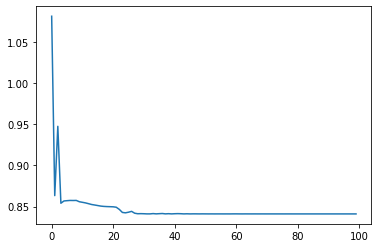

In [27]:
plt.plot(losses)
plt.show()

In [28]:
with torch.no_grad():
  model = model.to('cpu')
  y_pred = model(x_test)
  y_pred = y_pred.detach().numpy()
  predicted = np.argmax(y_pred, axis =1)
  accuracy = (accuracy_score(predicted, y_test))

In [29]:
print(f'model의 output은 :  {y_pred[0]}')
print(f'argmax를 한 후의 output은 {predicted[0]}')
print(f'accuracy는 {accuracy}')

model의 output은 :  [1. 0. 0.]
argmax를 한 후의 output은 0
accuracy는 0.7037037037037037


# < 3주차 과제 2 : CNN 맛보기>

In [30]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [31]:
# Training settings

batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [32]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
    self.mp = nn.MaxPool2d(2)
    self.fc = nn.Linear(320 , 10) ### : 알맞는 input은?

  def forward(self, x):
    in_size = x.size(0)
    x = F.relu(self.mp(self.conv1(x)))
    x = F.relu(self.mp(self.conv2(x)))
    x = x.view(in_size, -1)
    x = self.fc(x)
    return F.log_softmax(x)

In [33]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.005, momentum = 0.5)

loss 가 커졌다 작아졌다를 반복 --> lr을 좀 더 작게 세팅 시도 (기존 0.01--> Test set: Average loss: 0.0497, Accuracy: 9856/10000 (99%))
0.005 --> Test set: Average loss: 0.0728, Accuracy: 9782/10000 (98%) --> 성능하락

In [34]:
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = Variable(data), Variable(target)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 10 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

.eval() 함수는 evaluation 과정에서 사용하지 않아야 하는 layer들을 알아서 off 시키도록 하는 함수인 셈이다.

evaluation/validation 과정에선 보통 model.eval()과 torch.no_grad()를 함께 사용한다고 한다.


The cross-entropy loss and the (negative) log-likelihood are
the same in the following sense:

If you apply Pytorch’s CrossEntropyLoss to your output layer,
you get the same result as applying Pytorch’s NLLLoss to a
LogSoftmax layer added after your original output layer.

If you are designing a neural network multi-class classifier using PyTorch, you can use cross entropy loss (torch.nn.CrossEntropyLoss) with logits output (no activation) in the forward() method, or you can use negative log-likelihood loss (torch.nn.NLLLoss) with log-softmax (torch.LogSoftmax() module or torch.log_softmax() funcction) in the forward() method.

In [35]:
def test():
    model.eval() #model.eval() 의 기능은?
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data # nll_loss?? / cross entropy loss와의 관계 확인!
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [36]:
for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-32-006ecbc6c563>:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302879
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.312096
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.292641
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.276314
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.274389
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.271260
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.255590
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.234658
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.223798
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.221141
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.217464
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.178098
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.168100
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.120198
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.082436
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.084582
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.004205
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.962200
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.908873
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.769365
Train Epoch: 1 [12800/60000 (

<ipython-input-35-f52337105c2a>:6: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.8/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.2573, Accuracy: 9273/10000 (93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.251454
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.329077
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.246807
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.209519
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.263271
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.274154
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.345772
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.312248
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.139634
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.202887
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.124380
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.233634
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.223272
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.252815
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.158262
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.392689
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.252501
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.253266
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.231115
Train Epoch: 2 [12